In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns

In [237]:
faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \
    .drop(columns = ['actionDescription', 'faultValue'])

diagnostics = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv').pivot(index = 'FaultId', columns = 'Name', values = 'Value')

faults_diagnostics_a = faults.merge(diagnostics, left_on = 'RecordID', right_on = 'FaultId').set_index('EventTimeStamp').sort_index()


C:\Users\Conrad\AppData\Local\Temp\ipykernel_2604\559072201.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \


In [248]:
faults_diagnostics_a['EquipmentID']


EventTimeStamp
2000-03-18 19:14:10    2015
2000-03-18 19:14:10    2015
2000-03-18 19:20:47    2015
2000-03-18 19:20:47    2015
2000-03-19 02:59:58    1849
                       ... 
2020-03-06 14:14:13    2377
2020-03-06 14:15:34    2377
2026-05-16 14:44:11    1744
2026-05-16 14:44:11    1744
2026-05-16 14:44:11    1744
Name: EquipmentID, Length: 1187335, dtype: object

In [216]:
faults_diagnostics['EventCluster_3H'] = 1
faults_diagnostics['EventCluster_6H'] = 1
faults_diagnostics['EventCluster_12H'] = 1
faults_diagnostics

,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
EventTimeStamp,,,,,,,,,,,,,,,,,,,,,
2000-03-18 19:14:10,108604425,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,True,...,1279,False,NaN,0,NaN,100,0.58,1,1,1
2000-03-18 19:14:10,108604426,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,True,...,1279,False,NaN,0,NaN,100,0.58,1,1,1
2000-03-18 19:20:47,108604487,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,False,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2000-03-18 19:20:47,108604488,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,3,False,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2000-03-19 02:59:58,108608408,Not Reporting Data Wheel Sensor ABS Axle 2 Right,AAAI000032*AAAM000038*BB41275 *A82J140721A_9...,5W26153559,EC80ESP,BNDWS,11,792,7,False,...,1279,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06 14:14:13,123906113,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,True,...,1023,False,NaN,11.84489,14.1,100,1.74,1,1,1
2020-03-06 14:15:34,123906131,Low (Severity Medium) Engine Coolant Level,04384413*22544852*090619141107*60701756*G1*BGT*,NaN,NaN,NaN,0,111,18,False,...,1023,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
2026-05-16 14:44:11,87903705,Low Voltage (Catalyst Dosing Unit),unknown,unknown,unknown,unknown,0,3361,4,False,...,1023,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [217]:
rolling_window_3H = faults_diagnostics.groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()
rolling_window_6H = faults_diagnostics.groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()
rolling_window_12H = faults_diagnostics.groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()

,EquipmentID,EventCluster_3H
EventTimeStamp,,
2015-04-26 06:16:16,301,1.0
2015-04-28 05:29:21,301,1.0
2015-05-10 07:11:34,301,1.0
2015-05-10 07:59:25,301,2.0
2015-05-11 13:11:20,301,1.0
...,...,...
2015-02-24 16:24:05,R1762,4.0
2015-02-26 13:12:11,R1762,1.0
2015-02-26 13:50:59,R1762,2.0


In [137]:
rolling_window_3H['EventCluster_3H'] = (rolling_window_3H['EventCluster_3H'].shift() >= rolling_window_3H['EventCluster_3H']).cumsum() + 1
rolling_window_6H['EventCluster_6H'] = (rolling_window_6H['EventCluster_6H'].shift() >= rolling_window_6H['EventCluster_6H']).cumsum() + 1
rolling_window_12H['EventCluster_12H'] = (rolling_window_12H['EventCluster_12H'].shift() >= rolling_window_12H['EventCluster_12H']).cumsum() + 1

In [138]:
faults_diagnostics = faults_diagnostics.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
faults_diagnostics = faults_diagnostics.merge(rolling_window_3H, on = ['EventTimeStamp', 'EquipmentID'])
faults_diagnostics = faults_diagnostics.merge(rolling_window_6H, on = ['EventTimeStamp', 'EquipmentID'])
faults_diagnostics = faults_diagnostics.merge(rolling_window_12H, on = ['EventTimeStamp', 'EquipmentID'])
faults_diagnostics = faults_diagnostics.drop_duplicates()

In [139]:
pd.set_option('display.max_rows', 500)

rolling_window_12H.head(200)


,EquipmentID,EventCluster_12H
EventTimeStamp,,
2015-04-26 06:16:16,301,1
2015-04-28 05:29:21,301,2
2015-05-10 07:11:34,301,3
2015-05-10 07:59:25,301,3
2015-05-11 13:11:20,301,4
2015-05-11 13:50:02,301,4
2015-05-13 08:22:32,301,5
2015-05-13 10:19:19,301,5
2015-05-18 09:34:05,301,6


In [140]:
faults_diagnostics.to_csv('../data/faults_diagnostics.csv')

In [141]:
derate_trucks_list = faults_diagnostics[faults_diagnostics['spn']==1569]['ESS_Id'].drop_duplicates().tolist()

#derate_trucks = derate_trucks.merge(faults_diagnostics)
derate_trucks = faults_diagnostics[faults_diagnostics['ESS_Id'].isin(derate_trucks_list)].reset_index()

# Redone rolling with normalized dates

In [314]:
faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \
    .drop(columns = ['actionDescription', 'faultValue'])

diagnostics = pd.read_csv('../data/VehicleDiagnosticOnboardData.csv').pivot(index = 'FaultId', columns = 'Name', values = 'Value')

faults_diagnostics = faults.merge(diagnostics, left_on = 'RecordID', right_on = 'FaultId').set_index('EventTimeStamp').sort_index().reset_index()


C:\Users\Conrad\AppData\Local\Temp\ipykernel_2604\2533930152.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv('../data/J1939Faults.csv', index_col = 'RecordID', parse_dates = ['EventTimeStamp', 'LocationTimeStamp']) \


In [315]:
faults_diagnostics['EquipmentID'] = faults_diagnostics['EquipmentID'].astype(str)

In [316]:
derate_trucks_list = faults_diagnostics[faults_diagnostics['spn']==1569]['EquipmentID'].drop_duplicates().tolist()

#derate_trucks = derate_trucks.merge(faults_diagnostics)
derate_trucks = faults_diagnostics[faults_diagnostics['EquipmentID'].isin(derate_trucks_list)]
derate_trucks.dtypes

EventTimeStamp               datetime64[ns]
ESS_Id                                int64
eventDescription                     object
ecuSoftwareVersion                   object
ecuSerialNumber                      object
ecuModel                             object
ecuMake                              object
ecuSource                             int64
spn                                   int64
fmi                                   int64
active                                 bool
activeTransitionCount                 int64
EquipmentID                          object
MCTNumber                             int64
Latitude                            float64
Longitude                           float64
LocationTimeStamp            datetime64[ns]
AcceleratorPedal                     object
BarometricPressure                   object
CruiseControlActive                  object
CruiseControlSetSpeed                object
DistanceLtd                          object
EngineCoolantTemperature        

In [268]:
seven_days = datetime.timedelta(7)

truck_template = derate_trucks[:0]

for i in derate_trucks_list:
    truck = derate_trucks[(derate_trucks['EquipmentID'] == i)]
    first_derate_time = derate_trucks[(derate_trucks['EquipmentID'] == i) & (derate_trucks['spn'] == 1569)].iloc[0]['EventTimeStamp']
    mask = (truck['EventTimeStamp']<= first_derate_time) & (truck['EventTimeStamp']>= first_derate_time - seven_days)
    truck = truck.loc[mask]
    truck['diff'] = truck['EventTimeStamp'] - truck['EventTimeStamp'].shift(-1)
    truck['diff'] = truck['diff'].fillna(pd.Timedelta(seconds=0))
    truck['NewDateID'] = pd.to_datetime('2000-01-1 00:00:00', format='%Y-%m-%d %H:%M:%S')
    truck['NewDateID'] = truck['NewDateID'] + truck['diff']
    truck_template = pd.concat([truck_template, truck], ignore_index=True, sort=False)
                          
    

In [329]:
seven_days = datetime.timedelta(7)

truck_template = derate_trucks[:0]

for i in derate_trucks_list:
    
    truck = derate_trucks[(derate_trucks['EquipmentID'] == i)]
    first_derate_time = derate_trucks[(derate_trucks['EquipmentID'] == i) & (derate_trucks['spn'] == 1569)].iloc[0]['EventTimeStamp']
    mask = (truck['EventTimeStamp']<= first_derate_time) & (truck['EventTimeStamp']>= first_derate_time - seven_days)
    truck = truck.loc[mask]
    truck['diff'] = truck['EventTimeStamp'] - truck['EventTimeStamp'].shift(-1)
    truck['diff'] = truck['diff'].fillna(pd.Timedelta(seconds=0))
    truck_template = pd.concat([truck_template, truck], ignore_index=True, sort=False)
    
                          

In [333]:
original_time_pd_truck = truck_template.set_index('EventTimeStamp').sort_index()

original_time_pd_truck['EventCluster_3H'] = 1
original_time_pd_truck['EventCluster_6H'] = 1
original_time_pd_truck['EventCluster_12H'] = 1
original_time_pd_truck

rolling_window_3H = original_time_pd_truck.groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()
rolling_window_6H = original_time_pd_truck.groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()
rolling_window_12H = original_time_pd_truck.groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()
    
rolling_window_3H['EventCluster_3H'] = (rolling_window_3H['EventCluster_3H'].shift() >= rolling_window_3H['EventCluster_3H']).cumsum() + 1
rolling_window_6H['EventCluster_6H'] = (rolling_window_6H['EventCluster_6H'].shift() >= rolling_window_6H['EventCluster_6H']).cumsum() + 1
rolling_window_12H['EventCluster_12H'] = (rolling_window_12H['EventCluster_12H'].shift() >= rolling_window_12H['EventCluster_12H']).cumsum() + 1
    
original_time_pd_truck = original_time_pd_truck.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
original_time_pd_truck = original_time_pd_truck.merge(rolling_window_3H, on = ['EventTimeStamp', 'EquipmentID'])
original_time_pd_truck = original_time_pd_truck.merge(rolling_window_6H, on = ['EventTimeStamp', 'EquipmentID'])
original_time_pd_truck = original_time_pd_truck.merge(rolling_window_12H, on = ['EventTimeStamp', 'EquipmentID'])
original_time_pd_truck = original_time_pd_truck.drop_duplicates()

In [377]:
original_time_pd_truck[(original_time_pd_truck['spn'] != 1569) & (original_time_pd_truck['EquipmentID'] == '1968')][-2:-1]

,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,active,...,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,diff,EventCluster_3H,EventCluster_6H,EventCluster_12H
EventTimeStamp,,,,,,,,,,,,,,,,,,,,,


In [374]:
preceeding_error = original_time_pd_truck[:0]

for i in derate_trucks_list:
    try:
        pe = original_time_pd_truck[original_time_pd_truck['EquipmentID'] == i][-2:-1]
    except:
        pass
    preceeding_error = pd.concat([preceeding_error, pe], ignore_index=True, sort=False)

In [375]:
preceeding_error['spn'].value_counts()

3362     83
1761     46
3251     40
111      37
3216     26
3226     22
641      21
102      20
1569     18
5394     13
4094     12
411      10
3360     10
3703      8
929       8
4334      7
3364      6
1209      6
596       6
3031      5
3363      5
6802      5
27        4
4340      4
50353     4
3361      4
4342      4
4794      4
639       3
4364      3
5019      3
157       3
5743      3
3610      2
96        2
5319      2
3936      2
829       2
2791      2
1068      1
3464      1
563       1
790       1
652       1
630       1
2863      1
108       1
5246      1
5848      1
245       1
4376      1
627       1
612       1
4363      1
101       1
168       1
1347      1
Name: spn, dtype: int64

In [327]:
truck_template = truck_template.sort_index()
truck_template['NewDateID'] = pd.to_datetime('2000-01-1 01:00:00', format='%Y-%m-%d %H:%M:%S')
truck_template['NewDateID'] = truck_template['NewDateID'] + truck_template['diff']   

truck_template['EventCluster_3H'] = 1
truck_template['EventCluster_6H'] = 1
truck_template['EventCluster_12H'] = 1
    
rolling_window_3H = truck_template.groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()
rolling_window_6H = truck_template.groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()
rolling_window_12H = truck_template.groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()
    
rolling_window_3H['EventCluster_3H'] = (rolling_window_3H['EventCluster_3H'].shift() >= rolling_window_3H['EventCluster_3H']).cumsum() + 1
rolling_window_6H['EventCluster_6H'] = (rolling_window_6H['EventCluster_6H'].shift() >= rolling_window_6H['EventCluster_6H']).cumsum() + 1
rolling_window_12H['EventCluster_12H'] = (rolling_window_12H['EventCluster_12H'].shift() >= rolling_window_12H['EventCluster_12H']).cumsum() + 1
    
truck_template = truck_template.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
truck_template = truck_template.merge(rolling_window_3H, on = ['EventTimeStamp', 'EquipmentID'])
truck_template = truck_template.merge(rolling_window_6H, on = ['EventTimeStamp', 'EquipmentID'])
truck_template = truck_template.merge(rolling_window_12H, on = ['EventTimeStamp', 'EquipmentID'])
truck_template = truck_template.drop_duplicates()
    
truck_template = truck_template.reset_index()
    
    
truck_template

,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,...,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,diff,NewDateID,EventCluster_3H,EventCluster_6H,EventCluster_12H
0,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,31,...,NaN,65.25368,NaN,100,25.81,-1 days +23:00:02,2000-01-01 00:00:02,3323,2616,1977
1,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,31,...,NaN,62.4381,NaN,100,25.81,0 days 00:00:00,2000-01-01 01:00:00,3323,2616,1977
2,2011-01-01 00:03:29,13908742,NaN,04358814*06088094*061516161145*09401661*G1*BDR*,79909430,6X1u13D1500000000,CMMNS,0,5394,5,...,NaN,0,NaN,100,0.29,-1 days +23:57:31,2000-01-01 00:57:31,3186,2505,1876
3,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,31,...,NaN,9.689507,NaN,100,1.45,0 days 00:00:00,2000-01-01 01:00:00,2495,1969,1479
4,2011-01-01 00:03:34,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,0,...,NaN,9.689507,NaN,100,1.45,0 days 00:00:00,2000-01-01 01:00:00,2495,1969,1479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,...,NaN,NaN,NaN,NaN,NaN,-1 days +15:59:45,1999-12-31 16:59:45,2945,2325,1731
9770,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,NaN,0,NaN,100,0,-1 days +23:56:52,2000-01-01 00:56:52,2946,2326,1731
9771,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,NaN,NaN,NaN,NaN,NaN,-2 days +12:46:00,1999-12-30 13:46:00,2946,2326,1731
9772,2020-01-11 08:41:01,116585401,Low Voltage (Catalyst Dosing Unit),04358814*06011740*051718174436*09401683*G1*BDR*,79897853,6X1u13D1500000000,CMMNS,0,3361,4,...,NaN,70.12756,NaN,100,10.44,-1 days +22:27:39,1999-12-31 23:27:39,2947,2327,1732


KeyboardInterrupt: 

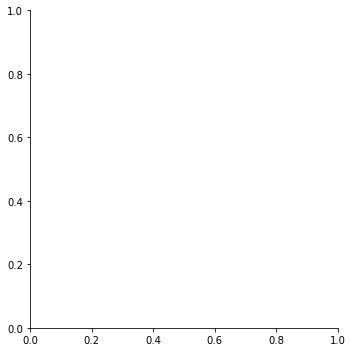

In [328]:
#plt.plot(truck_template['NewDateID'], truck_template['EventCluster_3H'])
sns.catplot(data = truck_template, x='NewDateID', y='EventCluster_3H', hue='EquipmentID')

In [269]:
partial_derate_reset = truck_template.drop(columns='diff')
partial_derate_reset = partial_derate_reset.set_index('NewDateID')

In [270]:

truck_template.shape

(9775, 43)

In [271]:
partial_derate_reset['EventCluster_3H'] = 1
partial_derate_reset['EventCluster_6H'] = 1
partial_derate_reset['EventCluster_12H'] = 1
partial_derate_reset

,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,fmi,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
NewDateID,,,,,,,,,,,,,,,,,,,,,
1999-12-31 23:00:02,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,31,...,17407,False,NaN,65.25368,NaN,100,25.81,1,1,1
2000-01-01 00:00:00,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,31,...,18431,False,NaN,62.4381,NaN,100,25.81,1,1,1
2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,31,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
2000-01-01 00:00:00,2011-01-01 00:03:34,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,0,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
1999-12-31 23:57:31,2011-01-01 00:03:29,13908742,NaN,04358814*06088094*061516161145*09401661*G1*BDR*,79909430,6X1u13D1500000000,CMMNS,0,5394,5,...,17407,True,NaN,0,NaN,100,0.29,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-31 15:59:45,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,3,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1999-12-31 23:56:52,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,255,True,NaN,0,NaN,100,0,1,1,1
1999-12-30 12:46:00,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,8,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [280]:
test = partial_derate_reset.reset_index().reset_index().rename(columns={'index':'ID'}).set_index('ID')
test

,NewDateID,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
ID,,,,,,,,,,,,,,,,,,,,,
0,1999-12-31 23:00:02,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,...,17407,False,NaN,65.25368,NaN,100,25.81,1,1,1
1,2000-01-01 00:00:00,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,...,18431,False,NaN,62.4381,NaN,100,25.81,1,1,1
2,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
3,2000-01-01 00:00:00,2011-01-01 00:03:34,77308358,NaN,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,5246,...,22527,False,NaN,9.689507,NaN,100,1.45,1,1,1
4,1999-12-31 23:57:31,2011-01-01 00:03:29,13908742,NaN,04358814*06088094*061516161145*09401661*G1*BDR*,79909430,6X1u13D1500000000,CMMNS,0,5394,...,17407,True,NaN,0,NaN,100,0.29,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,1999-12-31 15:59:45,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
9771,1999-12-31 23:56:52,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,True,NaN,0,NaN,100,0,1,1,1
9772,1999-12-30 12:46:00,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


In [284]:
partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count()

,EquipmentID,EventCluster_3H
NewDateID,,
2000-01-01 00:00:00,105338352,1.0
2000-01-01 00:00:00,105338352,2.0
1999-12-30 22:15:15,105344451,1.0
1999-12-31 01:37:04,105344451,1.0
1999-12-31 06:08:54,105344451,1.0
...,...,...
1999-12-31 23:23:01,309,3.0
1999-12-31 23:53:35,309,4.0
2000-01-01 00:00:00,309,5.0


In [261]:
rolling_window_3H = partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_3H'].rolling('3H').count().reset_index().reset_index()
rolling_window_6H = partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_6H'].rolling('6H').count()reset_index().reset_index()
rolling_window_12H = partial_derate_reset.sort_index().groupby('EquipmentID', as_index = False)['EventCluster_12H'].rolling('12H').count()reset_index().reset_index()

In [262]:
partial_derate_reset = partial_derate_reset.drop(columns = ['EventCluster_3H', 'EventCluster_6H', 'EventCluster_12H'])
partial_derate_reset = partial_derate_reset.merge(rolling_window_3H, on = ['NewDateID', 'EquipmentID'])
partial_derate_reset = partial_derate_reset.merge(rolling_window_6H, on = ['NewDateID', 'EquipmentID'])
partial_derate_reset = partial_derate_reset.merge(rolling_window_12H, on = ['NewDateID', 'EquipmentID'])
partial_derate_reset = partial_derate_reset.drop_duplicates()

In [265]:
partial_derate_reset = partial_derate_reset.reset_index()

,NewDateID,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,ecuMake,ecuSource,spn,...,LampStatus,ParkingBrake,ServiceDistance,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,EventCluster_3H,EventCluster_6H,EventCluster_12H
0,1999-12-31 23:00:02,2000-03-19 13:02:36,108639840,Condition Exists Catalyst Dosing Unit Input Lines,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,3362,...,17407,False,NaN,65.25368,NaN,100,25.81,1.0,1.0,1.0
1,2000-01-01 00:00:00,2000-03-19 14:02:34,108644439,Condition Exists Engine Protection Torque Derate,04358814*06086133*051718174436*09401683*G1*BDR*,79923861,6X1u13D1500000000,CMMNS,0,1569,...,18431,False,NaN,62.4381,NaN,100,25.81,2.0,2.0,2.0
2,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1.0,1.0,1.0
3,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1.0,1.0,2.0
4,2000-01-01 00:00:00,2011-01-01 00:03:34,77308356,Condition Exists Engine Protection Torque Derate,05317106*04101156*020516150530*09400053*G1*BDR*,79743733,6X1u13D1500000000,CMMNS,0,1569,...,22527,False,NaN,9.689507,NaN,100,1.45,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14464463,1999-12-31 23:44:14,2020-01-09 13:07:52,116360654,High Voltage (Left Fuel Level Sensor),NaN,NaN,CECU3B-NAMUX4,PACCR,49,829,...,1279,True,NaN,0,NaN,100,0.58,2.0,2.0,3.0
14464464,1999-12-31 15:59:45,2020-01-09 13:23:38,116364731,High Voltage (Fuel Level),NaN,NaN,CECU3B-NAMUX4,PACCR,49,96,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
14464465,1999-12-31 23:56:52,2020-01-09 21:23:53,116419454,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,True,NaN,0,NaN,100,0,3.0,3.0,4.0
14464466,1999-12-30 12:46:00,2020-01-09 21:27:01,116419520,Abnormal Frequency J1939 Network #2,NaN,NaN,CECU3B-NAMUX4,PACCR,49,1231,...,255,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
